# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Silvia Dela Pranistia
- **Email:** silviadela52@gmail.com
- **ID Dicoding:** silvia_dela_pranistia_kDUR

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren perubahan polutan (CO, NO₂, PM10, PM2.5) dari waktu ke waktu?  
2. Apakah suhu dan kelembapan berpengaruh terhadap kadar polutan udara?

## Import Semua Packages/Library yang Digunakan

In [11]:
# Library utama untuk analisis data
import pandas as pd
import numpy as np

# Library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

import glob
import os

# Pengaturan tampilan visualisasi
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

print("Semua library berhasil diimpor.")


Semua library berhasil diimpor.


## Data Wrangling

### Gathering Data

In [12]:
# Tentukan lokasi semua file dataset di folder lokal
path = 'PRSA_Data_20130301-20170228'  # folder yang berisi file CSV

# Cari semua file yang diawali dengan "PRSA_Data_"
all_files = glob.glob(os.path.join(path, "PRSA_Data_*.csv"))

print("File ditemukan:")
for f in all_files:
    print("-", os.path.basename(f))

# Baca seluruh file CSV dan tambahkan nama stasiun (dari nama file)
dataframes = []
for filename in all_files:
    df_temp = pd.read_csv(filename, delimiter=',', quotechar='"')
    df_temp['station_name'] = os.path.basename(filename).replace('PRSA_Data_','').replace('_20130301-20170228.csv','')
    dataframes.append(df_temp)

# Gabungkan seluruh dataframe menjadi satu
df = pd.concat(dataframes, ignore_index=True)

# 5. Tampilkan 5 baris pertama
print(f"\n Total data gabungan: {len(df):,} baris")
df.head()

File ditemukan:
- PRSA_Data_Aotizhongxin_20130301-20170228.csv
- PRSA_Data_Changping_20130301-20170228.csv
- PRSA_Data_Dingling_20130301-20170228.csv
- PRSA_Data_Dongsi_20130301-20170228.csv
- PRSA_Data_Guanyuan_20130301-20170228.csv
- PRSA_Data_Gucheng_20130301-20170228.csv
- PRSA_Data_Huairou_20130301-20170228.csv
- PRSA_Data_Nongzhanguan_20130301-20170228.csv
- PRSA_Data_Shunyi_20130301-20170228.csv
- PRSA_Data_Tiantan_20130301-20170228.csv
- PRSA_Data_Wanliu_20130301-20170228.csv
- PRSA_Data_Wanshouxigong_20130301-20170228.csv

 Total data gabungan: 420,768 baris

 Total data gabungan: 420,768 baris


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,station_name
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,Aotizhongxin


**Insight:**
- Dataset berhasil dimuat dan terdiri dari pengamatan kualitas udara tiap jam daridari 12 stasiun pemantauan di Beijing.
Stasiun-stasiun tersebut meliputi: Aotizhongxin, Changping, Dingling, Dongsi, Gucheng, Guanyuan, Huairou, Nongzhanguan, Shunyi, Tiantan, Wanliu, dan Wanshouxigong.
- Kolom yang tersedia mencakup waktu (year, month, day, hour), berbagai polutan (PM2.5, PM10, SO₂, NO₂, CO, O₃), serta kondisi cuaca (TEMP, PRES, DEWP, RAIN, WSPM).
- Data ini akan digunakan untuk menganalisis tren polusi dan hubungannya dengan suhu serta kelembapan.


### Assessing Data

In [13]:
# Data Wrangling — Assessing Data

# 1. Cek ukuran dataset (jumlah baris dan kolom)
print("Ukuran dataset:", df.shape)

# 2. Lihat tipe data setiap kolom
print("\nTipe data tiap kolom:")
print(df.dtypes)

# 3. Cek jumlah data kosong (missing values)
print("\nJumlah missing value per kolom:")
print(df.isnull().sum())

# 4. Cek apakah ada data duplikat
print("\nJumlah data duplikat:", df.duplicated().sum())

# 5. Lihat statistik deskriptif untuk kolom numerik
df.describe()


Ukuran dataset: (420768, 19)

Tipe data tiap kolom:
No                int64
year              int64
month             int64
day               int64
hour              int64
PM2.5           float64
PM10            float64
SO2             float64
NO2             float64
CO              float64
O3              float64
TEMP            float64
PRES            float64
DEWP            float64
RAIN            float64
wd               object
WSPM            float64
station          object
station_name     object
dtype: object

Jumlah missing value per kolom:
No                  0
year                0
month               0
day                 0
hour                0
PM2.5            8739
PM10             6449
SO2              9021
NO2             12116
CO              20701
O3              13277
TEMP              398
PRES              393
DEWP              403
RAIN              390
wd               1822
WSPM              318
station             0
station_name        0
dtype: int64

Jumlah data d

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


**Insight:**
- Dataset gabungan memiliki 420.768 baris dan 19 kolom, berisi data kualitas udara per jam dari 12 stasiun pemantauan di Beijing.
- Kolom `PM2.5`, `PM10`, dan `CO` memiliki beberapa nilai kosong sehingga perlu dilakukan pembersihan pada tahap berikutnya.
- Tidak ditemukan duplikasi data.
- Sebagian besar kolom bertipe numerik (float64), sedangkan `wd` dan `station` bertipe teks (object).


### Cleaning Data

In [14]:
# Data Wrangling — Cleaning Data

# Hapus baris yang semua nilainya kosong
df.dropna(how='all', inplace=True)

# Isi nilai kosong (NaN) pada kolom polutan dengan nilai rata-rata kolom tersebut
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
for col in pollutants:
      df[col].fillna(df[col].mean(), inplace=True)

# Pastikan kolom numerik memiliki tipe data yang benar
numeric_cols = ['year', 'month', 'day', 'hour'] + pollutants + ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Buat kolom datetime dari kombinasi tahun, bulan, hari, dan jam
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']], errors='coerce')

# Tangani missing value untuk kolom cuaca & angin
weather_cols = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Isi dengan nilai rata-rata kolom
for col in weather_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Untuk kolom arah angin (wd) isi dengan modus (nilai yang paling sering muncul)
df['wd'] = df['wd'].fillna(df['wd'].mode().iloc[0])

# Urutkan data berdasarkan waktu
df.sort_values('datetime', inplace=True)

# Cek ulang apakah masih ada missing value
print("Jumlah missing value setelah cleaning:")
print(df.isnull().sum())


C:\Users\Silvia Dels\AppData\Local\Temp\ipykernel_12136\3369625527.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\Silvia Dels\AppData\Local\Temp\ipykernel_12136\3369625527.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Jumlah missing value setelah cleaning:
No              0
year            0
month           0
day             0
hour            0
PM2.5           0
PM10            0
SO2             0
NO2             0
CO              0
O3              0
TEMP            0
PRES            0
DEWP            0
RAIN            0
wd              0
WSPM            0
station         0
station_name    0
datetime        0
dtype: int64


**Insight:**
- Seluruh kolom berhasil dibersihkan dari nilai kosong.
- Kolom numerik diisi dengan nilai rata-rata, sedangkan kolom arah angin (`wd`) diisi dengan nilai modus.
- Dataset kini sepenuhnya bersih dan siap digunakan

## Exploratory Data Analysis (EDA)

### Explore ...

Ringkasan Statistik Data:


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,DEWP,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,2.490822,1.729711
std,79.978679,91.066422,21.417257,34.618463,1131.283304,55.760484,11.430729,13.787240,1.245914
min,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,-43.400000,0.000000
25%,21.000000,36.000000,3.000000,24.000000,500.000000,12.000000,3.100000,-8.900000,0.900000
50%,57.000000,84.000000,8.000000,45.000000,900.000000,47.000000,14.500000,3.000000,1.400000
75%,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.200000,15.100000,2.200000
max,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,29.100000,13.200000


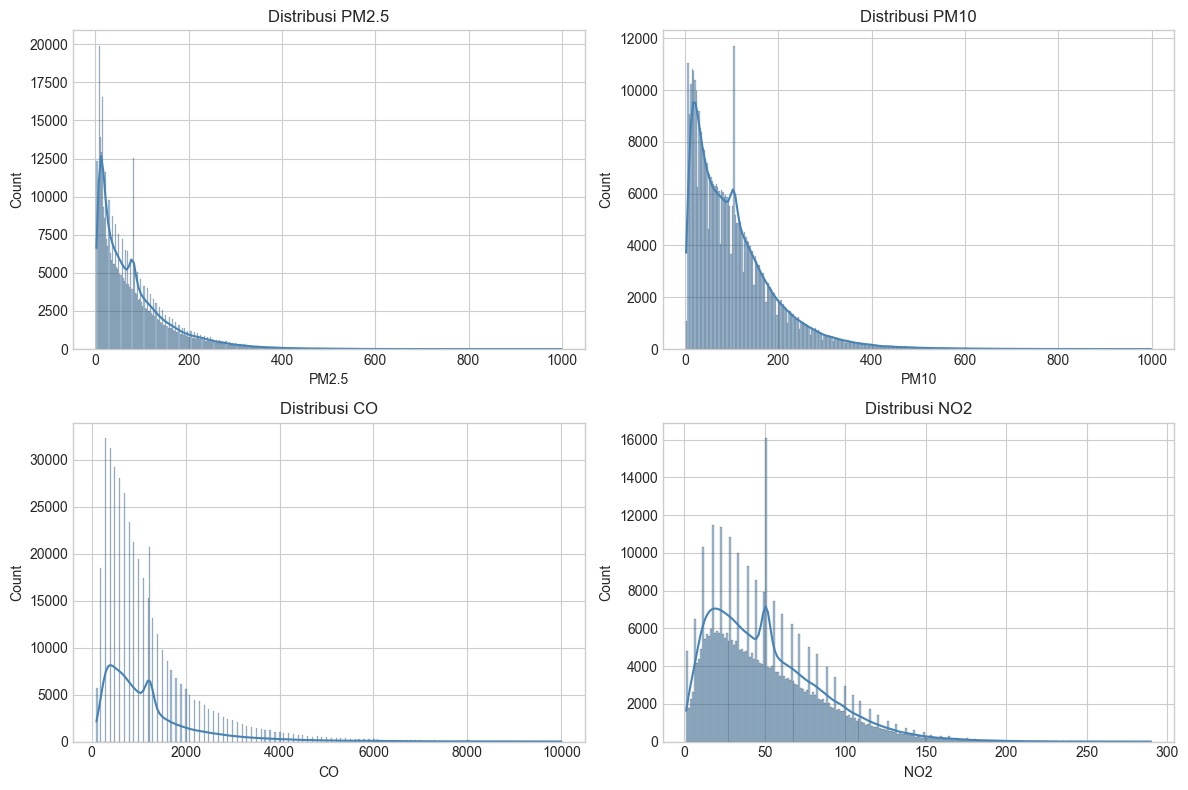

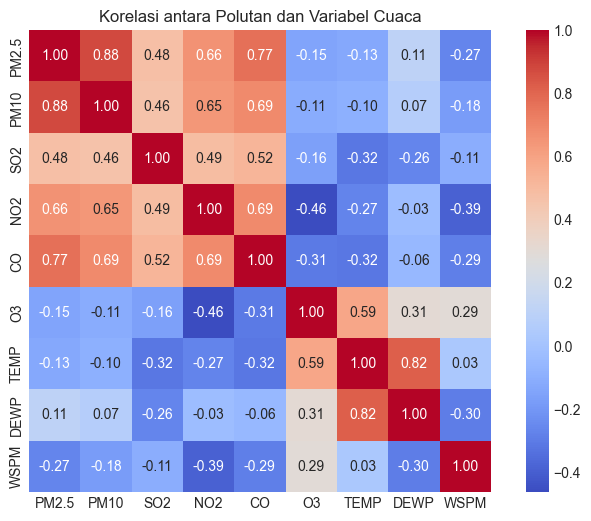

In [15]:
# Cek ringkasan statistik dari data numerik
print("Ringkasan Statistik Data:")
display(df[['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','DEWP','WSPM']].describe())

# Cek distribusi data untuk polutan utama
plt.figure(figsize=(12, 8))
for i, col in enumerate(['PM2.5', 'PM10', 'CO', 'NO2'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color='steelblue')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

# Heatmap korelasi antara polutan & parameter cuaca
corr_cols = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','DEWP','WSPM']
corr = df[corr_cols].corr()

plt.figure(figsize=(9,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Korelasi antara Polutan dan Variabel Cuaca")
plt.show()

**Insight:**
- Distribusi seluruh polutan (PM2.5, PM10, CO, dan NO2) menunjukkan pola condong ke kanan (right-skewed), menandakan sebagian besar nilai berada pada konsentrasi rendah dengan beberapa nilai ekstrem tinggi.
- PM2.5 dan PM10 memiliki sebaran paling besar, menunjukkan fluktuasi signifikan terhadap kondisi udara.
- Konsentrasi CO cenderung stabil di kisaran rendah namun memiliki nilai puncak pada periode tertentu yang mengindikasikan peningkatan aktivitas pembakaran atau emisi kendaraan.
- NO2 menunjukkan pola distribusi ganda (bimodal), mengindikasikan adanya dua kondisi dominan kualitas udara di lokasi pengamatan.


## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana tren perubahan polutan (CO, NO₂, PM10, PM2.5) dari waktu ke waktu?

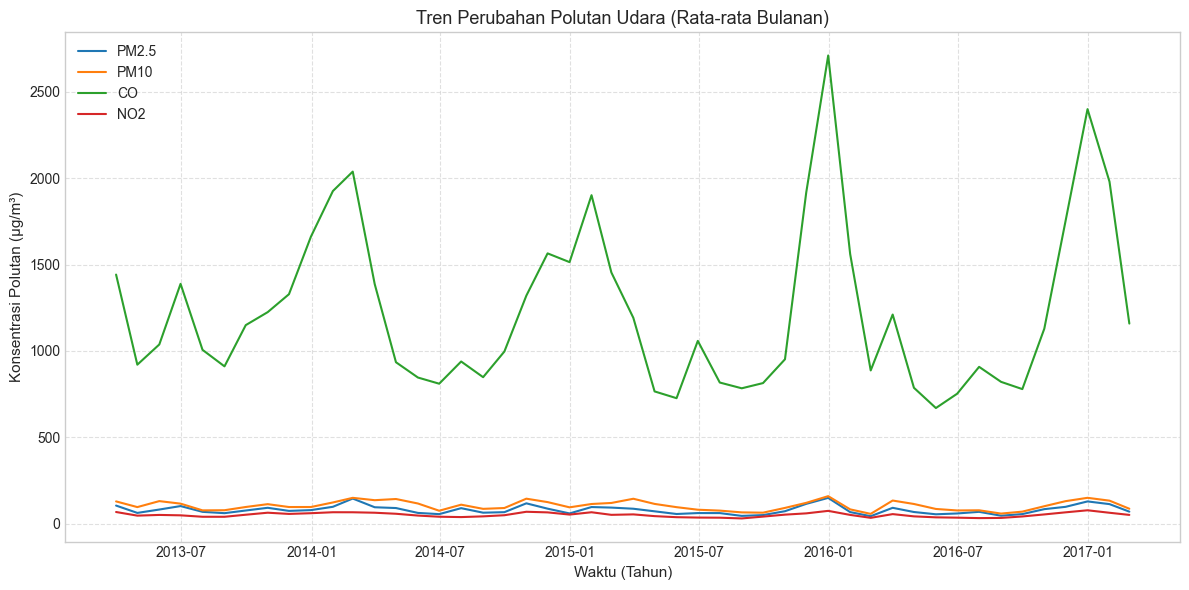

In [16]:
# =====================================================
# Pertanyaan 1:
# Bagaimana tren perubahan polutan (CO, NO₂, PM10, PM2.5) dari waktu ke waktu?
# =====================================================

# Pastikan kolom datetime sudah ada
if 'datetime' not in df.columns:
    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']], errors='coerce')

# Set kolom datetime sebagai index agar bisa diolah secara time series
df = df.set_index('datetime')

# Ambil rata-rata per bulan agar tren jangka panjangnya terlihat
monthly_pollutants = df[['PM2.5', 'PM10', 'CO', 'NO2']].resample('ME').mean()

# Visualisasi tren polutan dari waktu ke waktu
plt.figure(figsize=(12, 6))
for col in monthly_pollutants.columns:
    plt.plot(monthly_pollutants.index, monthly_pollutants[col], label=col)

plt.title("Tren Perubahan Polutan Udara (Rata-rata Bulanan)", fontsize=13)
plt.xlabel("Waktu (Tahun)", fontsize=11)
plt.ylabel("Konsentrasi Polutan (µg/m³)", fontsize=11)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


**insight** :
* Kadar polutan (PM2.5, PM10, CO, dan NO₂) cenderung meningkat pada musim dingin
(Desember-Februari) dan menurun saat musim panas (Juni-Agustus), menunjukkan adanya pola musiman akibat faktor cuaca dan aktivitas pembakaran.
* Gas CO memiliki fluktuasi tertinggi dibanding polutan lainnya, menandakan bahwa sumbernya sangat dipengaruhi oleh aktivitas manusia seperti transportasi dan pembakaran bahan bakar.

### Pertanyaan 2: Apakah suhu dan kelembapan berpengaruh terhadap kadar polutan udara?


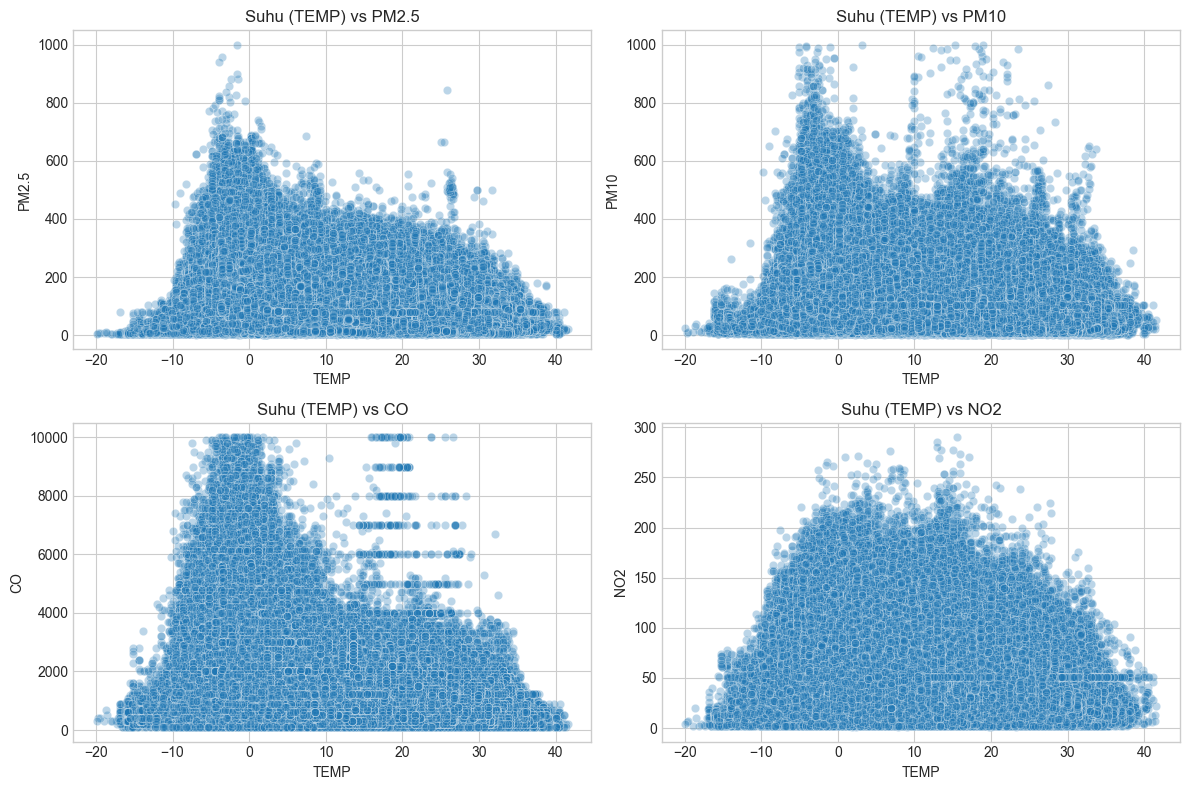

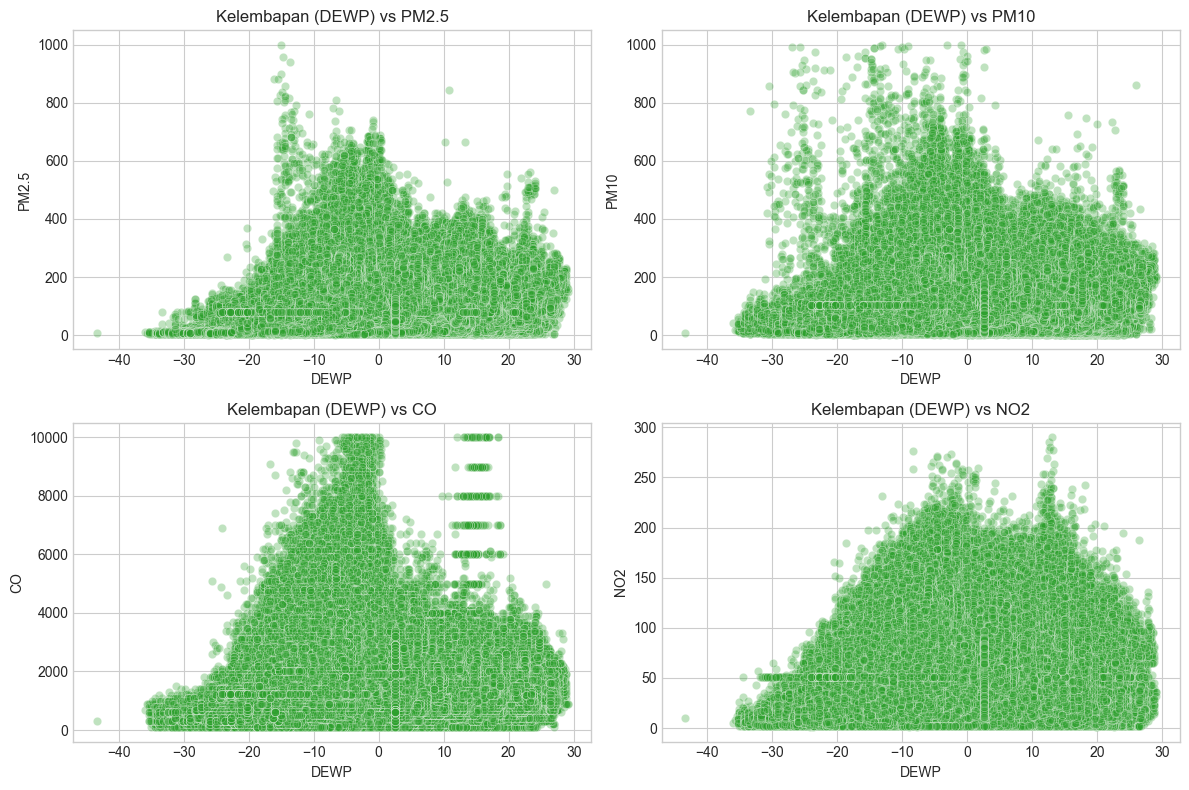

Korelasi Suhu (TEMP) dengan Polutan:
PM2.5   -0.130
PM10    -0.095
CO      -0.318
NO2     -0.274
Name: TEMP, dtype: float64

Korelasi Kelembapan (DEWP) dengan Polutan:
PM2.5    0.113
PM10     0.070
CO      -0.056
NO2     -0.031
Name: DEWP, dtype: float64


In [17]:
# =====================================================
# Pertanyaan 2:
# Apakah suhu (TEMP) dan kelembapan (DEWP) berpengaruh terhadap kadar polutan udara?
# =====================================================
# Tentukan kolom yang akan dianalisis
pollutants = ['PM2.5', 'PM10', 'CO', 'NO2']

# Scatter plot antara suhu vs polutan
plt.figure(figsize=(12, 8))
for i, pol in enumerate(pollutants, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x='TEMP', y=pol, data=df, alpha=0.3, color='tab:blue')
    plt.title(f'Suhu (TEMP) vs {pol}')
plt.tight_layout()
plt.show()

# 3Scatter plot antara kelembapan (DEWP) vs polutan
plt.figure(figsize=(12, 8))
for i, pol in enumerate(pollutants, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x='DEWP', y=pol, data=df, alpha=0.3, color='tab:green')
    plt.title(f'Kelembapan (DEWP) vs {pol}')
plt.tight_layout()
plt.show()

# Korelasi numerik untuk konfirmasi arah hubungan
corr_temp = df[['TEMP'] + pollutants].corr()['TEMP'][1:]
corr_dewp = df[['DEWP'] + pollutants].corr()['DEWP'][1:]

print("Korelasi Suhu (TEMP) dengan Polutan:")
print(corr_temp.round(3))
print("\nKorelasi Kelembapan (DEWP) dengan Polutan:")
print(corr_dewp.round(3))


**insight**:
Terdapat hubungan negatif antara suhu (TEMP) dan kadar polutan, terutama pada

*   CO dan NO₂. Artinya, saat suhu meningkat, kadar polutan menurun karena udara panas mempercepat penyebaran dan penguraian polutan.
*   Kelembapan (DEWP) memiliki korelasi sangat lemah terhadap polutan, menunjukkan bahwa perubahan kelembapan tidak berpengaruh signifikan terhadap konsentrasi PM2.5, PM10, CO, maupun NO₂.

## Analisis Lanjutan (Opsional)

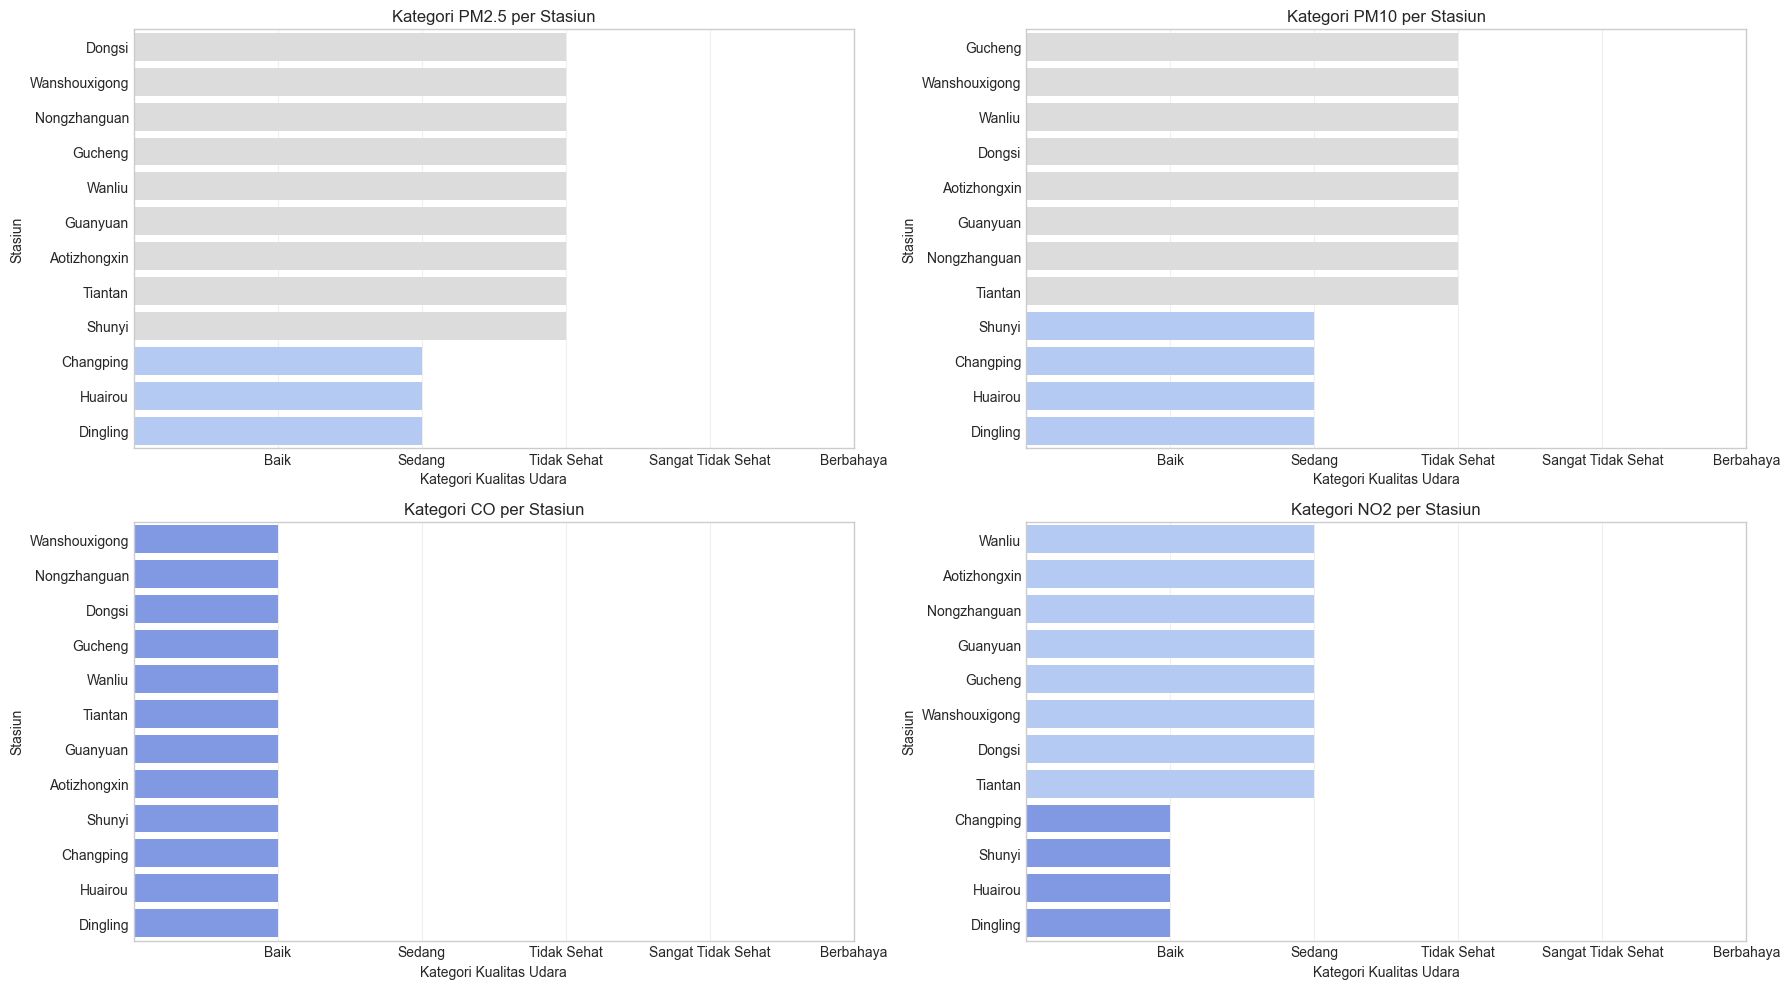

In [18]:
# === 1) Rata-rata polutan per stasiun ===
# Jika belum ada, buat dulu station_name dari station
if 'station_name' not in df.columns and 'station' in df.columns:
    df = df.copy()
    df['station_name'] = df['station'].astype(str)

# Ambil rata-rata (PM2.5, PM10, CO, NO2) per stasiun
station_avg = (df.groupby('station_name')[['PM2.5','PM10','CO','NO2']]
                 .mean()
                 .reset_index())

# === 2) Binning -> Kategori kualitas udara per polutan ===
# PM2.5 (µg/m³)
bins_pm25   = [0, 35, 75, 115, 150, 1000]
labels_pm25 = ['Baik','Sedang','Tidak Sehat','Sangat Tidak Sehat','Berbahaya']
station_avg.loc[:, 'Kategori_PM25'] = pd.cut(station_avg['PM2.5'], bins=bins_pm25, labels=labels_pm25)

# PM10 (µg/m³)
bins_pm10   = [0, 50, 100, 250, 350, 1000]
labels_pm10 = ['Baik','Sedang','Tidak Sehat','Sangat Tidak Sehat','Berbahaya']
station_avg.loc[:, 'Kategori_PM10'] = pd.cut(station_avg['PM10'], bins=bins_pm10, labels=labels_pm10)

# CO (µg/m³)
bins_co   = [0, 2000, 4000, 10000, 15000, 50000]
labels_co = ['Baik','Sedang','Tidak Sehat','Sangat Tidak Sehat','Berbahaya']
station_avg.loc[:, 'Kategori_CO'] = pd.cut(station_avg['CO'], bins=bins_co, labels=labels_co)

# NO2 (µg/m³)
bins_no2   = [0, 50, 100, 200, 400, 1000]
labels_no2 = ['Baik','Sedang','Tidak Sehat','Sangat Tidak Sehat','Berbahaya']
station_avg.loc[:, 'Kategori_NO2'] = pd.cut(station_avg['NO2'], bins=bins_no2, labels=labels_no2)

# === 3) Rapikan tipe kategori (urut) & mapping skor (untuk panjang bar) ===
order_labels  = ['Baik', 'Sedang', 'Tidak Sehat', 'Sangat Tidak Sehat', 'Berbahaya']
label_to_score = {lab: i+1 for i, lab in enumerate(order_labels)}  # Baik=1 ... Berbahaya=5

for cat_col in ['Kategori_PM25', 'Kategori_PM10', 'Kategori_CO', 'Kategori_NO2']:
    station_avg.loc[:, cat_col] = station_avg[cat_col].astype('category')
    station_avg.loc[:, cat_col] = station_avg[cat_col].cat.set_categories(order_labels, ordered=True)

# === 4) Plot bar horizontal: Y = nama stasiun, warna = kategori ===
plots = [
    ('PM2.5', 'Kategori_PM25'),
    ('PM10',  'Kategori_PM10'),
    ('CO',    'Kategori_CO'),
    ('NO2',   'Kategori_NO2'),
]

fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.flatten()

for ax, (pol, cat_col) in zip(axes, plots):
    tmp = station_avg[['station_name', pol, cat_col]].copy()
    # panjang bar = skor kategori (1..5)
    tmp['score'] = tmp[cat_col].map(label_to_score)
    # urutkan dari kategori terburuk ke terbaik, lalu nilai polutan menurun
    tmp = tmp.sort_values(['score', pol], ascending=[False, False])

    sns.barplot(
        data=tmp,
        y='station_name',
        x='score',
        hue=cat_col,             # <- menghindari warning palette tanpa hue
        palette='coolwarm',
        dodge=False,
        legend=False,
        ax=ax,
        orient='h'
    )

    # ganti ticks X (1..5) menjadi label kategori
    ax.set_xticks(list(label_to_score.values()), order_labels)
    ax.set_title(f'Kategori {pol} per Stasiun')
    ax.set_xlabel('Kategori Kualitas Udara')
    ax.set_ylabel('Stasiun')
    ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


## Conclusion

**- Conclution pertanyaan 1**
* Konsentrasi polutan (PM2.5, PM10, CO, NO₂) menunjukkan pola musiman yang konsisten, meningkat tajam pada musim dingin (Desember–Januari) dan menurun pada musim panas.
* Polutan CO memiliki fluktuasi terbesar, mencerminkan pengaruh aktivitas pembakaran bahan bakar dan lalu lintas.
* PM2.5 dan PM10 memiliki pola tren yang mirip, menandakan sumber emisi yang sama, seperti debu dan asap kendaraan.
* Secara umum, kualitas udara cenderung menurun pada suhu rendah, menunjukkan perlunya pengendalian emisi di periode tersebut.



**- Conclution pertanyaan 2**
* Terdapat korelasi negatif antara suhu (TEMP) dan kadar polutan, terutama pada CO (-0.32) dan NO₂ (-0.27), menandakan polusi meningkat saat suhu menurun.
* Kelembapan (DEWP) hanya memiliki pengaruh lemah, dengan korelasi mendekati nol terhadap semua polutan utama.
* Kondisi suhu rendah berpotensi menyebabkan akumulasi polutan di lapisan udara bawah, karena pergerakan udara menjadi lambat.
* Faktor meteorologis, terutama suhu, memiliki peran signifikan dalam dinamika kualitas udara perkotaan dan perlu dipertimbangkan dalam sistem pemantauan.
